In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize

import seaborn as sns

pd.set_option('display.max_columns', 60)

# Imputing missing values
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Evaluating Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, mean_absolute_error

import itertools

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
data_df= pd.read_csv('/content/Usecase1_Energy_Star_Score_Dataset.csv')

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
data_df.shape

(11746, 60)

In [7]:
data_df.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [8]:
data_df.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [10]:
data_df['ENERGY STAR Score'].value_counts()

Not Available    2104
100               649
1                 299
99                162
80                144
84                142
83                138
86                138
88                136
73                128
87                128
82                128
89                127
79                126
85                126
81                126
93                125
92                124
74                124
77                123
98                122
90                120
78                119
95                119
67                119
76                118
68                118
69                114
65                112
91                112
64                110
71                110
70                110
97                109
75                108
94                108
59                108
55                103
66                102
60                102
96                102
63                102
57                101
72                101
58                 94
50        

## Looks like missing data is filled as 'Not Available', replace them with nan.

In [11]:
data_df = data_df.replace({'Not Available': np.nan})


In [12]:
# Iterate through the columns
for col in list(data_df.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data_df[col] = data_df[col].astype(float)

In [13]:
# Look at converted data types
data_df.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

## Look at Percentage of Missing Values in Each Column

In [14]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [15]:
missing_values_table(data_df)


Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


## EDA

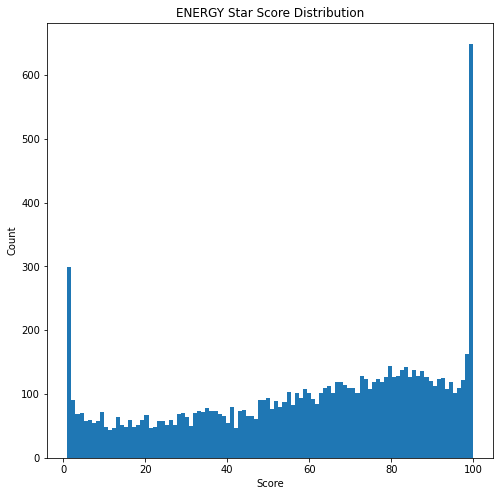

In [16]:
figsize(8, 8)
plt.hist(data_df['ENERGY STAR Score'].dropna(), bins = 100);
plt.xlabel('Score'); plt.ylabel('Count'); plt.title('ENERGY Star Score Distribution');

In [17]:
data_df['ENERGY STAR Score'].value_counts().sort_values(ascending=False)


100.0    649
1.0      299
99.0     162
80.0     144
84.0     142
83.0     138
86.0     138
88.0     136
82.0     128
87.0     128
73.0     128
89.0     127
81.0     126
79.0     126
85.0     126
93.0     125
74.0     124
92.0     124
77.0     123
98.0     122
90.0     120
67.0     119
78.0     119
95.0     119
68.0     118
76.0     118
69.0     114
65.0     112
91.0     112
70.0     110
71.0     110
64.0     110
97.0     109
59.0     108
75.0     108
94.0     108
55.0     103
60.0     102
63.0     102
96.0     102
66.0     102
57.0     101
72.0     101
58.0      94
50.0      93
61.0      92
49.0      91
48.0      91
2.0       91
52.0      89
54.0      87
62.0      85
56.0      83
41.0      80
53.0      79
35.0      78
51.0      77
44.0      75
43.0      74
37.0      73
33.0      73
36.0      73
9.0       72
34.0      71
4.0       70
29.0      70
32.0      70
3.0       69
38.0      69
28.0      68
20.0      67
39.0      66
46.0      66
45.0      66
30.0      64
13.0      64
47.0      61

There are two modes in the data, one at 1 and another at 100. This seems like something to follow up on. Is there some shared characteristic among buildings that have a 1 or 100? The ENERGY STAR Score is a percentile score, so it seems unreasonable that so many buildings are clustered at the two extremes. Given that Energy Star Score is based on self-reported energy usage, it might not be that good of a measure. Let's take a look at another value often used for characterizing the efficiency of a building, the Energy Use Intensity which attempts to normalize the energy usage of a building by the size of a building.

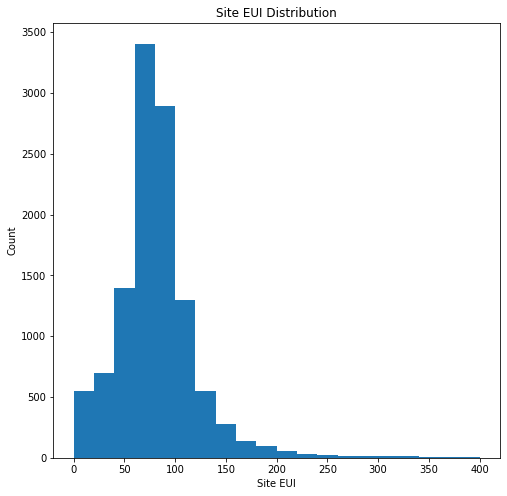

In [18]:
plt.hist(data_df['Site EUI (kBtu/ft²)'].dropna(), range = (0, 400), bins = 20);
plt.xlabel('Site EUI'); plt.ylabel('Count'); plt.title('Site EUI Distribution');

This plot is more normally distributed with no obvious skew. The Site EUI is probably a better measure of individual building energy performance than the Energy Star Score.

## Correlations with Energy Star Score


In [19]:
data_df.corr()['ENERGY STAR Score'].sort_values()

Fuel Oil #1 Use (kBtu)                                       -0.793589
Fuel Oil #4 Use (kBtu)                                       -0.217676
Fuel Oil #5 & 6 Use (kBtu)                                   -0.192863
Diesel #2 Use (kBtu)                                         -0.171081
Fuel Oil #2 Use (kBtu)                                       -0.144715
Year Built                                                   -0.118181
District Steam Use (kBtu)                                    -0.116806
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.067762
Electricity Use - Grid Purchase (kBtu)                       -0.066330
Weather Normalized Site Electricity (kWh)                    -0.065789
Total GHG Emissions (Metric Tons CO2e)                       -0.047934
Property Id                                                  -0.047020
Latitude                                                     -0.044262
Source EUI (kBtu/ft²)                                        -0.042873
Weathe

The most significant correlations (in absolute magnitude) are between Fuel Oil Use and Energy Star Score. This makes sense: the more fuel oil a building uses, the lower the Energy Star Score. There are no significant positive linear correlations.

The issue with using Fuel Oil Use is that this column contains 99.9% missing values. Therefore, it will not be very useful in training a model because of the limited information.

## Correlations with Site EUI


In [20]:
data_df.corr()['Weather Normalized Site EUI (kBtu/ft²)'].sort_values()


ENERGY STAR Score                                            -0.035227
Occupancy                                                    -0.013070
Latitude                                                     -0.009111
Community Board                                              -0.009037
Order                                                        -0.000599
Number of Buildings - Self-reported                          -0.000455
Water Use (All Water Sources) (kgal)                         -0.000248
Water Intensity (All Water Sources) (gal/ft²)                 0.000304
Largest Property Use Type - Gross Floor Area (ft²)            0.009192
Property Id                                                   0.009993
Property GFA - Self-Reported (ft²)                            0.010757
Longitude                                                     0.011825
Council District                                              0.011931
Census Tract                                                  0.012966
DOF Gr

The highest correlations here are pretty obvious: Site EUI is kBtu/ft^2, so we would expect any measure of electricity usage to be linearly positively correlated with Site EUI. We could use Gas Use or Fuel Oil use to predict EUI, but by definition these should be correlated.

## Analyzing what Buildings with 1 or 100 Energy Star Score have in common


In [21]:
suspect = data_df[(data_df['ENERGY STAR Score'] == 1.0) | (data_df['ENERGY STAR Score'] == 100.0)]


In [22]:
suspect.head(5)


,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,aka 10 Clinton St,11201,10,CLINTON STREET,Brooklyn,212656.0,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,162656.0,Parking,40000.0,Retail Store,10000.0,1903,1,100,Whole Building,NaN,1.0,295.4,316.8,5.8,3.0,374.2,NaN,NaN,NaN,NaN,NaN,NaN,47522901.2,512710.7,3477064.5,1004824.0,2846.8,2524.2,322.7,172656.0,NaN,NaN,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,40.695835,-73.991673,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
21,24,2806486,Park 76th Street Inc.,2806486,Park 76th Street Inc.,1013900037;1013910034,1013900037;1013910034,1041702; 1041800,830-840 Park Avenue,NaN,10021,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,189766.0,NaN,NaN,NaN,NaN,1911,2,100,Whole Building,Whole Building,100.0,68.0,NaN,6.1,0.5,NaN,NaN,112138.8,NaN,NaN,NaN,NaN,8786386.9,98264.5,4013954.9,1156269.9,847.5,475.0,372.5,189766.0,NaN,NaN,115.6,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
22,25,4988686,- 830 Park Avenue bldg,2806486,Park 76th Street Inc.,1013900037,1013900037,1041702,830 Park Avenue,NaN,10021,830,PARK AVENUE,Manhattan,151666.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,130629.0,NaN,NaN,NaN,NaN,1911,1,100,Another configuration,NaN,100.0,23.7,23.4,6.8,NaN,73.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3090622.7,894049.0,286.8,0.0,286.8,130629.0,NaN,NaN,74.3,05/01/2017 10:09:31 PM,NaN,In Compliance,40.773465,-73.962116,8.0,4.0,130.0,Upper East Side-Carnegie Hill ...
23,26,4988688,- 840 Park Avenue bldg,2806486,Park 76th Street Inc.,1013910034,1013910034,1041800,840 Park Avenue,NaN,10021,840,PARK AVENUE,Manhattan,64827.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,54913.0,NaN,NaN,NaN,NaN,1911,1,100,Another configuration,NaN,100.0,17.9,17.4,4.8,0.0,52.3,NaN,NaN,NaN,NaN,NaN,NaN,59412.9,601.0,923332.2,262377.2,88.8,3.2,85.7,54913.0,231.9,4.22,53.9,05/01/2017 10:09:31 PM,Yes,In Compliance,40.773843,-73.961838,8.0,4.0,130.0,Upper East Side-Carnegie Hill ...
36,39,2658438,Business Law,3612678,Columbia University (morningside),1018670042,1018670042,1085710,1125 Amsterdam Avenue,NaN,10027,NaN,NaN,NaN,NaN,Office,Office,Office,83131.0,NaN,NaN,NaN,NaN,1996,1,100,Whole Building,Whole Building,100.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN

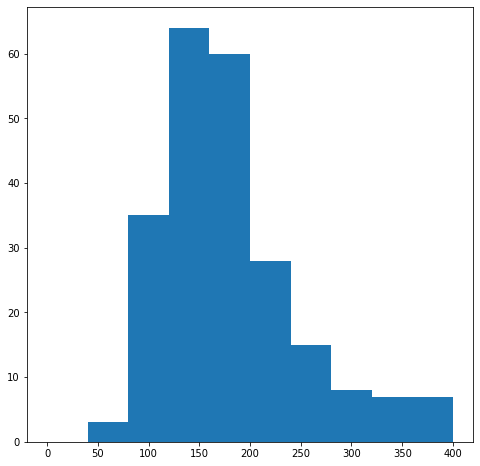

In [23]:
plt.hist(suspect[suspect['ENERGY STAR Score'] == 1.0]['Weather Normalized Site EUI (kBtu/ft²)'].dropna(), range = (0, 400));


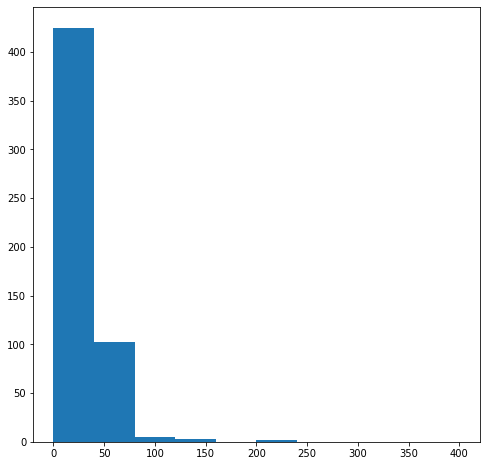

In [24]:
plt.hist(suspect[suspect['ENERGY STAR Score'] == 100.0]['Weather Normalized Site EUI (kBtu/ft²)'].dropna(), range = (0, 400));


It does look like buildings with Energy Star Scores of 100 have lower Site EUI than buildings with Energy Star Scores of 1.



## Energy Star by Building Type


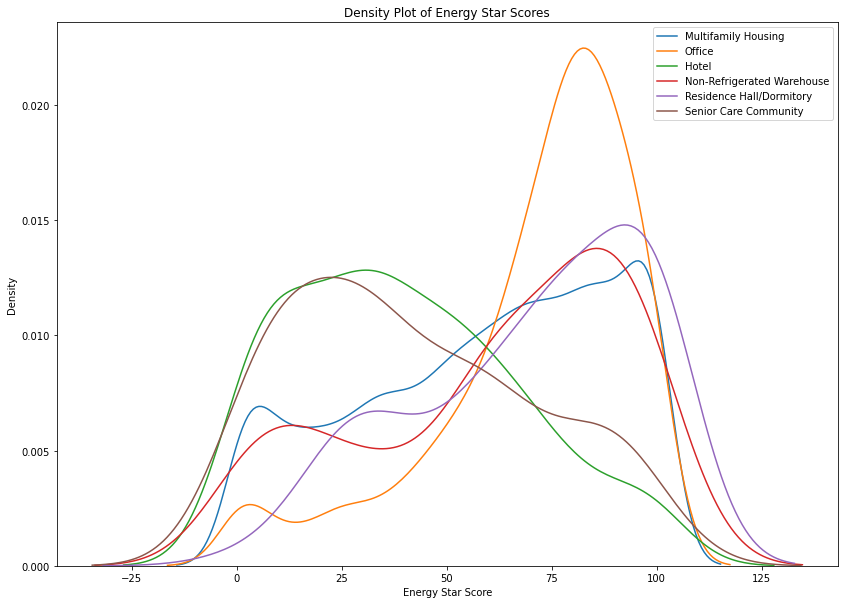

In [25]:
# Create a list of buildings with more than 80 measurements
types = data_df.dropna(subset=['ENERGY STAR Score'])
types = types['Primary Property Type - Self Selected'].value_counts()
types = list(types[types.values > 80].index)

figsize(14, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data_df[data_df['Primary Property Type - Self Selected'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = b_type);
    
plt.xlabel('Energy Star Score'); plt.ylabel('Density'); 
plt.title('Density Plot of Energy Star Scores');
plt.legend(loc="upper right")

Office buildings tend to have much higher Energy Star Scores than hotels and senior care communities. Residence halls and non-refrigerated warehouses also have higher scores while multifamily housing has a bi-modal distribution of scores similar to the overall distribution. It would be useful to see if this holds across a larger sample size, and to get more data to figure out why some building types tend to do better.

## Site EUI by Building Type

I identified that there was a negative correlation between the Site EUI and the Energy Star Score. We can plot the Site EUI by building type to see if there is also a difference in Site EUI between building types.

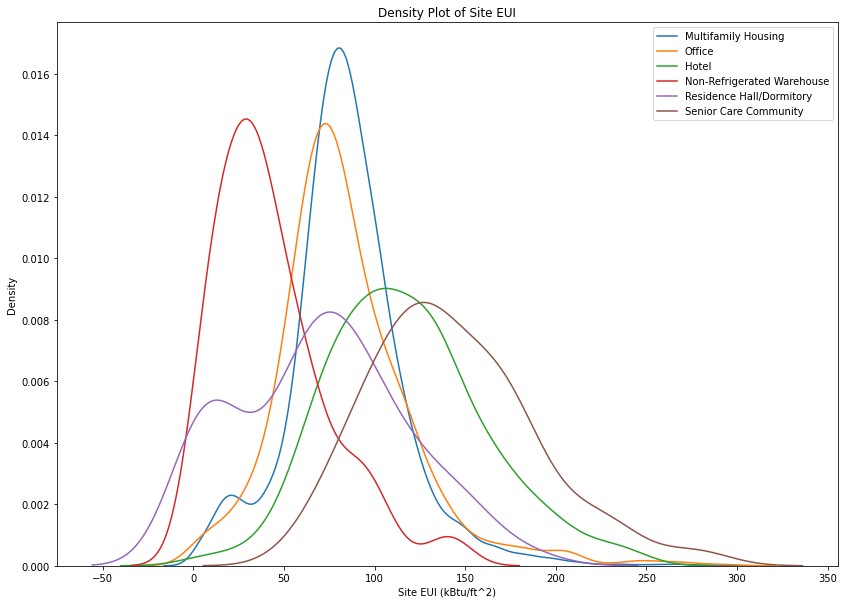

In [26]:
figsize(14, 10)

# Plot the site EUI density plot for each building type
for b_type in types:
    # Remove outliers before plotting
    subset = data_df[(data_df['Weather Normalized Site EUI (kBtu/ft²)'] < 300) & 
                     (data_df['Primary Property Type - Self Selected'] == b_type)]
    
    # Plot the site EUI on a density plot
    sns.kdeplot(subset['Weather Normalized Site EUI (kBtu/ft²)'].dropna(), 
                label = b_type);
    
plt.xlabel('Site EUI (kBtu/ft^2)'); plt.ylabel('Density'); 
plt.title('Density Plot of Site EUI');
plt.legend(loc="upper right")

This plot provides us with another conclusion: there appears to be a negative correlation between the Site EUI and the Energy Star Score based on comparing the two distributions between building types. Building types with lower Site EUI's tend to have higher Energy Star Scores. The higher the energy use intensity (which is energy use / area), the "worse" the building's energy efficiency performance. We can visualize the relationship between the Energy Star Score and the Site EUI in a scatterplot.

## Energy Star Score vs Site EUI

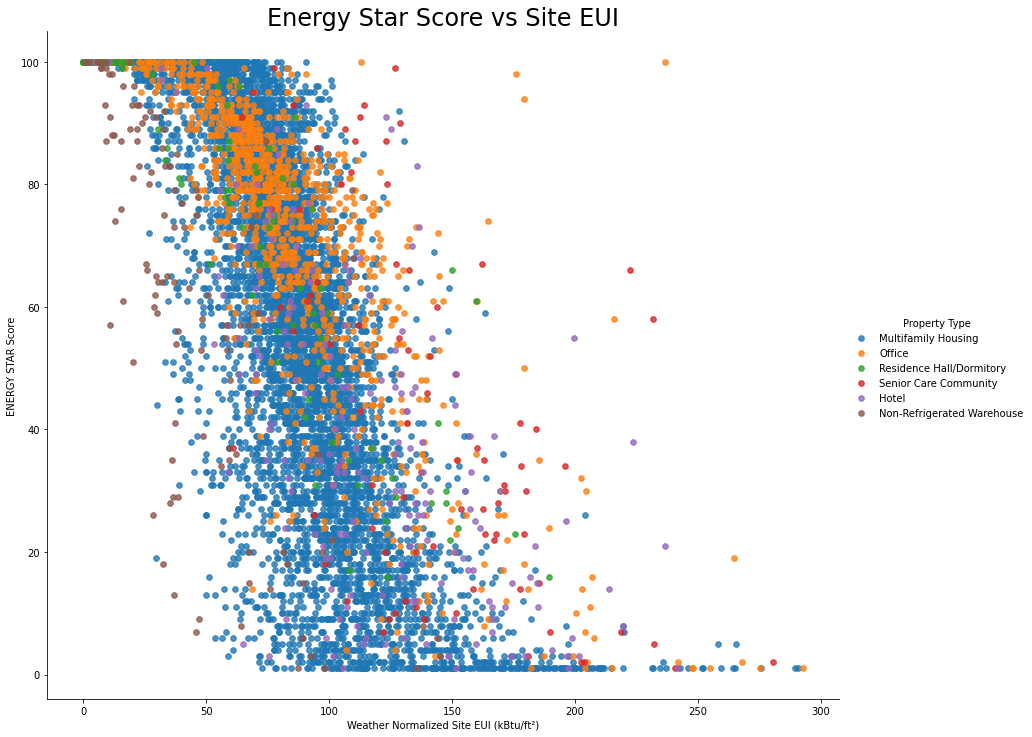

In [27]:
figsize(14, 10)

# Subset to the buildings with most measurements and remove outliers
subset = data_df[(data_df['Weather Normalized Site EUI (kBtu/ft²)'] < 300) & 
             (data_df['Primary Property Type - Self Selected'].isin(types))]

# Drop the buildings without a value
subset = subset.dropna(subset=['ENERGY STAR Score', 
                               'Weather Normalized Site EUI (kBtu/ft²)'])

subset = subset.rename(columns={'Primary Property Type - Self Selected': 'Property Type'})


# Linear Plot of Energy Star Score vs EUI
sns.lmplot(x='Weather Normalized Site EUI (kBtu/ft²)', y='ENERGY STAR Score', 
           data = subset, hue = 'Property Type', 
           scatter_kws={'alpha': 0.8, 's': 32}, fit_reg=False,height= 10, 
            aspect = 1.2);

plt.title('Energy Star Score vs Site EUI', size = 24);

The plot shows the expected negative relationship between Energy Star Score and Site EUI. This relationship looks like it holds across building types. To quantify the relationship, we can calculate the Pearson Correlation Coeffiecient between the two variables. This is a measure of linear correlation which shows both the strength and the direction of the relationship. We will look at the correlation coefficient between Energy Star Scores and several measures.

## Feature Engineering

'NYC Borough, Block and Lot (BBL) self-reported' is equal to 'BBL - 10 digits', where the first digit represents the 'Borough', next five digits 'Tax Block' and last four 'Tax Lot', plus we have already a 'Borough' column in the dataset. -- Since there are only two missing values at 'BBL - 10 digits', but more on the others, I'll check if I can use it to fill in the missing information.

In [28]:
data_df['Largest Property Use Rate'] = data_df['Largest Property Use Type - Gross Floor Area (ft²)']/data_df['Property GFA - Self-Reported (ft²)']
data_df['2nd Property Use Rate'] = data_df['2nd Largest Property Use - Gross Floor Area (ft²)']/data_df['Property GFA - Self-Reported (ft²)']
data_df['3rd Property Use Rate'] = data_df['3rd Largest Property Use Type - Gross Floor Area (ft²)']/data_df['Property GFA - Self-Reported (ft²)']
data_df['Direct GHG Emissions Rate'] = data_df['Direct GHG Emissions (Metric Tons CO2e)']/data_df['Total GHG Emissions (Metric Tons CO2e)']
data_df['BBL - 10 digits'] = data_df['BBL - 10 digits'].str.extract('(\d+)', expand=False)
data_df['Borough'] = data_df['BBL - 10 digits'].str[0]
data_df['Tax Block'] = data_df['BBL - 10 digits'].str[1:6]
data_df['Tax Lot'] = data_df['BBL - 10 digits'].str[6:10]
data_df['Postal Code'] = data_df['Postal Code'].astype(str)
data_df['Year Built'] = data_df['Year Built'].astype(str)
data_df['Borough'] = data_df['Borough'].astype(str)
data_df['Tax Block'] = data_df['Tax Block'].astype(str)
data_df['Tax Lot'] = data_df['Tax Lot'].astype(str)
data_df['Property Id'] = data_df['Property Id'].astype(str)

The Property Type colums has a lot of values, some that appears more often and others less. I have put them all together, and split into categories that I believed made a bit of sense, while also looking at their frequency.

In [29]:
property_type = {'Multifamily Housing':'Multifamily Housing',  
            'Residence Hall/Dormitory':'Residence Hall/Dormitory',
            'Other - Lodging/Residential':'Residence Hall/Dormitory',
            'Hotel':'Hotel',
            'Adult Education':'College/University',
            'College/University':'College/University',
            'K-12 School':'College/University',
            'Library':'College/University',
            'Vocational School':'College/University',
            'Other - Education':'College/University',
            'Office':'Office',
            'Medical Office':'Office',
            'Financial Office':'Office',
            'Bank Branch':'Office',
            'Distribution Center':'Distribution Center',
            'Self-Storage Facility':'Distribution Center',
            'Wholesale Club/Supercenter':'Distribution Center',
            'Non-Refrigerated Warehouse':'Distribution Center',
            'Fast Food Restaurant':'Food Service',
            'Food Sales':'Food Service',
            'Food Service':'Food Service',
            'Restaurant':'Food Service',
            'Supermarket/Grocery Store':'Food Service',
            'Convenience Store without Gas Station':'Food Service',
            'Other - Restaurant/Bar':'Food Service',
            'Hospital (General Medical & Surgical)':'Senior Care Community',
            'Urgent Care/Clinic/Other Outpatient':'Senior Care Community',
            'Ambulatory Surgical Center':'Senior Care Community',
            'Laboratory':'Senior Care Community',
            'Pre-school/Daycare':'Senior Care Community',
            'Senior Care Community':'Senior Care Community',
            'Outpatient Rehabilitation/Physical Therapy':'Senior Care Community',
            'Retail Store':'Retail Store',
            'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Automobile Dealership':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Personal Services (Health/Beauty, Dry Cleaning...':'Retail Store',
            'Enclosed Mall':'Retail Store',
            'Other - Mall':'Retail Store',
            'Other - Services':'Retail Store',
            'Other - Utility':'Retail Store',
            'Bar/Nightclub':'Recreation',
            'Bowling Alley':'Recreation',
            'Fitness Center/Health Club/Gym':'Recreation',
            'Other - Recreation':'Recreation',
            'Other - Entertainment/Public Assembly':'Recreation',
            'Performing Arts':'Recreation',
            'Social/Meeting Hall':'Recreation',
            'Museum':'Recreation',
            'Worship Facility':'Recreation',
            'Other':'Other',
            'Courthouse':'Other',
            'Other - Public Services':'Other',
            'Swimming Pool':'Other',
            'Parking':'Other',
            'Refrigerated Warehouse':'Other',
            'Data Center':'Other',
            'none':'none'
              }

In [30]:
data_df['Largest Property Use Type'] = data_df['Largest Property Use Type'].map(property_type).astype(str)
data_df['2nd Largest Property Use Type'] = data_df['2nd Largest Property Use Type'].map(property_type).astype(str)
data_df['3rd Largest Property Use Type'] = data_df['3rd Largest Property Use Type'].map(property_type).astype(str)

In [31]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

le = LabelEncoder()
data_df['n_Postal Code'] = le.fit_transform(data_df['Postal Code'])
data_df['n_Parent Property Id'] = le.fit_transform(data_df['Parent Property Id'])
data_df['n_Property Id'] = le.fit_transform(data_df['Property Id'])
data_df['n_Tax Lot'] = le.fit_transform(data_df['Tax Lot'])
data_df['n_Tax Block'] = le.fit_transform(data_df['Tax Block'])
data_df['n_3rd Largest Property Use Type'] = le.fit_transform(data_df['3rd Largest Property Use Type'])
data_df['n_2nd Largest Property Use Type'] = le.fit_transform(data_df['2nd Largest Property Use Type'])
data_df['n_Primary Property Type - Self Selected'] = le.fit_transform(data_df['Primary Property Type - Self Selected'])

#oe = OrdinalEncoder() -- discretize!!
data_df['n_Year Built'] = le.fit_transform(data_df['Year Built'])

In [32]:
# selection = ['Postal Code','Parent Property Id','Property Id','Tax Lot','Tax Block',
#         '3rd Largest Property Use Type','2nd Largest Property Use Type',
#         'Primary Property Type - Self Selected','Year Built']

# data_df = data_df.drop(selection, axis = 1)

In [33]:
data_df.shape

(11746, 75)

In [34]:
# List of Variables to find correlation coefficients
features = ['Primary Property Type - Self Selected',
            'Weather Normalized Site EUI (kBtu/ft²)',
            'Weather Normalized Site Electricity Intensity (kWh/ft²)',
             'Largest Property Use Type - Gross Floor Area (ft²)',
            'Natural Gas Use (kBtu)',
            'ENERGY STAR Score']

subset = data_df[features].dropna()
subset = subset[subset['Primary Property Type - Self Selected'].isin(types)]

# Rename the columns
subset.columns = ['Property Type', 'Site EUI', 
                  'Electricity Intensity', 'Floor Area',
                  'Natural Gas', 'Energy Star Score']

# Remove outliers
subset = subset[subset['Site EUI'] < 300]

In [35]:
# Group by the building type and calculate correlations
corrs = pd.DataFrame(subset.groupby('Property Type').corr())
corrs = pd.DataFrame(corrs['Energy Star Score'])

# Format the dataframe for display
corrs = corrs.reset_index()
corrs.columns = ['Property Type', 'Variable', 'Correlation with Score']
corrs = corrs[corrs['Variable'] != 'Energy Star Score']
corrs

,Property Type,Variable,Correlation with Score
0,Hotel,Site EUI,-0.598284
1,Hotel,Electricity Intensity,-0.553256
2,Hotel,Floor Area,0.042204
3,Hotel,Natural Gas,-0.097727
5,Multifamily Housing,Site EUI,-0.743034
6,Multifamily Housing,Electricity Intensity,-0.602274
7,Multifamily Housing,Floor Area,-0.007159
8,Multifamily Housing,Natural Gas,-0.168528
10,Non-Refrigerated Warehouse,Site EUI,-0.726648
11,Non-Refrigerated Warehouse,Electricity Intensity,-0.719545


This shows the correlation between Energy Star Score and three different measures by building type. For all buildings we see the following relationships: Energy Star Score is strongly negatively correlated with the Electricity Intensity and the Site EUI. The strength of the natural gas correlation depends on the dataset, but natural gas usage tends to be negatively correlated with the Energy Star Score as well. The relationship between floor area and the Energy Star score is weak for all building types.

## Remove Linearly dependent Variables

In order to find independent variables which can be used to predict the Energy Star Score, we will want to remove varialbes that are highly collinear. For example, the Site EUI and Source EUI are collinear because they both measure a very similar metric, and including both in the model will not give us independent predictors. One quick way to remove collinear variables is by calculating the correlation coefficient between every column and remove those columns with a correlation greater than a certain threshold.

In [36]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''
    # Dont want to remove correlations between Energy Star Score
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Site EUI (kBtu/ft²)'])
    x['ENERGY STAR Score'] = y
               
    return x

In [37]:
data_df.shape

(11746, 75)

In [38]:
new_data = corr_df(data_df, corr_val = 0.99)


Weather Normalized Source EUI (kBtu/ft²) | Site EUI (kBtu/ft²) | 1.0
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 1.0
Fuel Oil #1 Use (kBtu) | 2nd Largest Property Use - Gross Floor Area (ft²) | 1.0
Diesel #2 Use (kBtu) | Fuel Oil #2 Use (kBtu) | 1.0
Total GHG Emissions (Metric Tons CO2e) | District Steam Use (kBtu) | 1.0
Direct GHG Emissions (Metric Tons CO2e) | Natural Gas Use (kBtu) | 1.0
Direct GHG Emissions (Metric Tons CO2e) | Weather Normalized Site Natural Gas Use (therms) | 1.0
Indirect GHG Emissions (Metric Tons CO2e) | District Steam Use (kBtu) | 1.0
Source EUI (kBtu/ft²) | Site EUI (kBtu/ft²) | 0.99
Source EUI (kBtu/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 0.99
Source EUI (kBtu/ft²) | Weather Normalized Source EUI (kBtu/ft²) | 1.0
2nd Property Use Rate | Fuel Oil #1 Use (kBtu) | 1.0


In [39]:
new_data.shape

(11746, 66)

In [40]:
data_df.shape

(11746, 75)

In [41]:
new_data= data_df.copy()

## Add in Log Transformations of Variables

In [42]:
log_data = new_data.copy()

for col in new_data.select_dtypes('number').columns:
    log_data['log_%s' % col] = np.log10(new_data[col])
    
log_data = log_data.replace({-np.inf: np.nan})

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
for col in log_data.select_dtypes('number').columns:
    if np.any(np.isinf(log_data[col])):
        print(col)

Largest Property Use Rate
log_Largest Property Use Rate


In [44]:
log_data.corr()['ENERGY STAR Score'].sort_values()


log_Fuel Oil #1 Use (kBtu)                                       -0.853418
Fuel Oil #1 Use (kBtu)                                           -0.793589
log_Source EUI (kBtu/ft²)                                        -0.607204
log_Site EUI (kBtu/ft²)                                          -0.604309
log_Weather Normalized Source EUI (kBtu/ft²)                     -0.601330
log_Weather Normalized Site EUI (kBtu/ft²)                       -0.592217
log_Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.439732
log_Diesel #2 Use (kBtu)                                         -0.392011
log_Total GHG Emissions (Metric Tons CO2e)                       -0.376263
log_Direct GHG Emissions (Metric Tons CO2e)                      -0.292434
log_Indirect GHG Emissions (Metric Tons CO2e)                    -0.274698
log_Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.271061
log_Electricity Use - Grid Purchase (kBtu)                       -0.270065
log_Weather Normalized Si

The log transformed variables have a greater absolute magnitude correlation with the target. This means they might be of use in a linear regression model. We can compare performance with and without these variables.

In [45]:
def train_test_reg(df):

    
    X = df.select_dtypes('number')
    
    X['Largest Property Use Type'] = df['Largest Property Use Type']
    X['Metered Areas (Energy)'] = df['Metered Areas (Energy)']
    X['DOF Benchmarking Submission Status'] = df['DOF Benchmarking Submission Status']
    X['Borough']= df['Borough']
    X['Largest Property Use Type']= df['Largest Property Use Type']
    
    X = pd.get_dummies(X)
    
    missing_scores = X[X['ENERGY STAR Score'].isnull()]
    
    X = X.dropna(subset = ['ENERGY STAR Score'])
    
    y = X['ENERGY STAR Score']
    if 'log_ENERGY STAR Score' in list(X.columns):
#         X = X.drop(columns=['log_Longitude', 'log_ENERGY STAR Score', 'log_Property Id'])
#         missing_scores = missing_scores.drop(columns = ['log_Longitude', 'log_ENERGY STAR Score', 'log_Property Id'])
        X = X.drop(columns=['log_Longitude', 'log_ENERGY STAR Score'])
        missing_scores = missing_scores.drop(columns = ['log_Longitude', 'log_ENERGY STAR Score'])
        
#     X = X.drop(columns = ['Property Id', 'ENERGY STAR Score', 'Longitude'])
    X = X.drop(columns = [ 'ENERGY STAR Score', 'Longitude'])
#     missing_scores = missing_scores.drop(columns = ['Property Id', 'ENERGY STAR Score', 'Longitude'])
    missing_scores = missing_scores.drop(columns = ['ENERGY STAR Score', 'Longitude'])
    feature_names = list(X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
#     missing_scores = imputer.transform(missing_scores)
    
    return X_train, X_test, y_train, y_test, missing_scores, feature_names

In [46]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_reg(new_data)


## Regression on Energy Star Scores

We will evalute our regression predictions using mean absolute error. This is simply the average error in absolute value of our predictions from the actual value and has the advantage of being easily explainable.

First we should establish a baseline measure to beat. We can use the average Energy Star Score as a baseline by predicting the mean absolute error if we simply guess the average Energy Star Score in the training date for every observation in the testing data.

In [47]:
reg_baseline = np.mean(y_train)
reg_mae = np.mean(abs(reg_baseline - y_test))

print('Baseline Mean Absolute Error: {:0.4f}.'.format(reg_mae))

Baseline Mean Absolute Error: 25.8261.


If our model cannot achieve lower than this score, then perhaps a regression approach will not work for this problem. First, let's see if a simple linear regression will work for this problem.

### Linear Regression without Log Transformed Variables


In [48]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

lin_reg_pred = lin_reg.predict(X_test)
lin_reg_mse = np.mean(abs(lin_reg_pred - y_test))
print('Linear Regression Mean Absolute Error: {:0.4f}.'.format(lin_reg_mse))

Linear Regression Mean Absolute Error: 24.1080.


### Linear Regression with Log Transformed Variables


In [49]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_reg(log_data)

lin_reg.fit(X_train, y_train)

lin_reg_pred = lin_reg.predict(X_test)
lin_reg_mse = np.mean(abs(lin_reg_pred - y_test))
print('Linear Regression Mean Absolute Error: {:0.4f}.'.format(lin_reg_mse))

Linear Regression Mean Absolute Error: 17.9402.


The linear regression does not perform much better than the baseline although the log transformed features do reduce the error. Even though this is better than the baseline, let's implement a random forest regression and check the error.

### Random Forest with Log Transformed Variables


In [50]:
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train, y_train)

rf_reg_pred = rf_reg.predict(X_test)

rf_reg_mse = np.mean(abs(rf_reg_pred - y_test))
print('Random Forest Regresion Mean Absolute Error: {:0.4f}.'.format(rf_reg_mse))

Random Forest Regresion Mean Absolute Error: 8.4053.


### Random Forest without Log Transformed Variables


In [51]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_reg(new_data)


In [52]:
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train, y_train)

rf_reg_pred = rf_reg.predict(X_test)

rf_reg_mse = np.mean(abs(rf_reg_pred - y_test))
print('Random Forest Regresion Mean Absolute Error: {:0.4f}.'.format(rf_reg_mse))

Random Forest Regresion Mean Absolute Error: 8.8844.


These scores are much better and indicate that machine learning may indeed be appropriate for this problem. However, what we gain in accuracy with a more complex model, we lose in interpretability. The random forest predictions are much harder to explain than those from a linear regression. We will use the non-log transformed variables to reduce the number of features in our model.

In [53]:
len(feature_names)

72

### Boosting model without Log Transformed Variables


In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


gradient_boosted=GradientBoostingRegressor(loss='absolute_error', max_depth=5,  
                          max_features=None,
                          min_samples_leaf=6,
                          min_samples_split=6,
                          n_estimators=500)

gradient_boosted.fit(X_train, y_train)
predictions = gradient_boosted.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 8.5150


In [55]:
def interpret_features(feature_list, importances):
    feature_df = pd.DataFrame({'feature': feature_list, 'importance': importances}).sort_values('importance', ascending = False)
    figsize(8, 8)
    plt.bar(feature_df[feature_df['importance'] > 0.001]['feature'], feature_df[feature_df['importance'] > 0.001]['importance'])
    plt.xticks(rotation = 90)
    plt.xlabel('feature'); plt.ylabel('importance'); plt.title('Top Feature Importances')
    plt.show();
    
    return feature_df

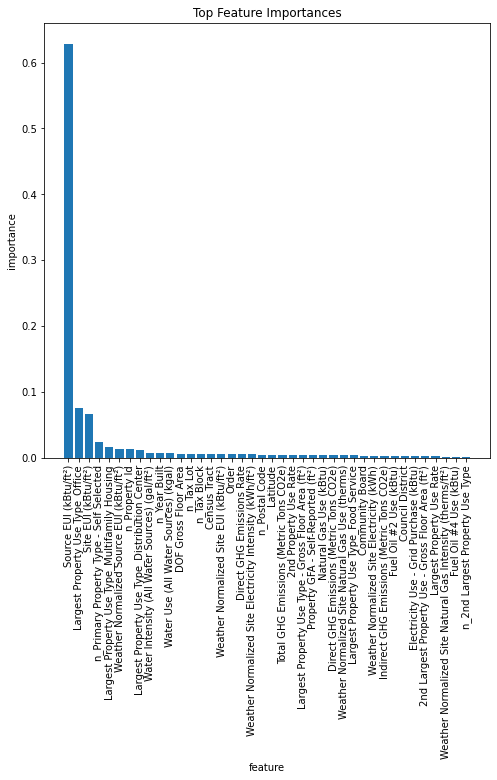

In [56]:
feature_df = interpret_features(feature_names, rf_reg.feature_importances_)


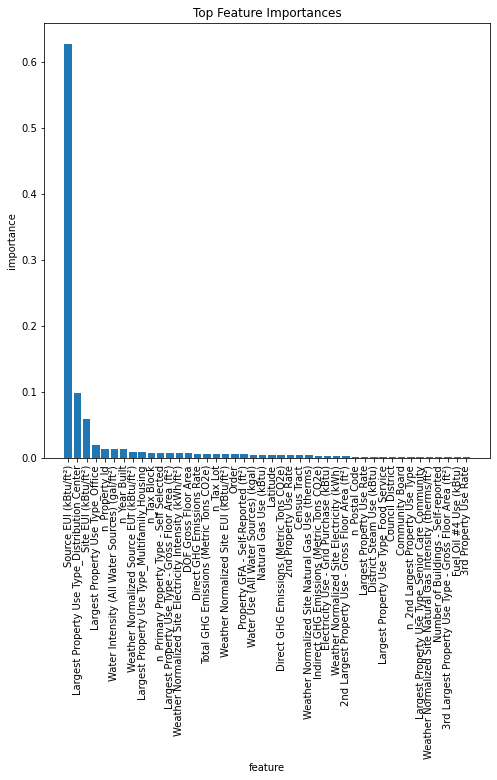

In [57]:
feature_df = interpret_features(feature_names, gradient_boosted.feature_importances_)


In [58]:
feature_df.head(10)


,feature,importance
28,Source EUI (kBtu/ft²),0.628065
47,Largest Property Use Type_Distribution Center,0.098291
7,Site EUI (kBtu/ft²),0.059049
51,Largest Property Use Type_Office,0.018977
39,n_Property Id,0.013481
27,Water Intensity (All Water Sources) (gal/ft²),0.013124
45,n_Year Built,0.013113
11,Weather Normalized Source EUI (kBtu/ft²),0.008660
50,Largest Property Use Type_Multifamily Housing,0.008344
41,n_Tax Block,0.008160


According to the random forest and boosting model, the most importance features for predicting the Energy Star Score of a building are the Site EUI, the Water Intensity, Largest Property Use Type_Office, the Water Use Use. These are in line with the variables that we saw are the most correlated with the Energy Star Score.

## Conclusions

* The Site Energy Use Intensity, the Water/Electricity Intensity, the Water Use/natural gas use, and the Building Type are the most useful measures for determining the energy star score.
* Energy Star Scores are skewed high with a disproportionate global maximum at 100 and a secondary maximum at 1.
* Offices, residence halls, and non-refrigerated warehouses have higher energy star scores than senior care communities and hotels with scores of multi-family housing falling in between.
* The Site Energy Use Intensity, the Electricity Intensity, and the natural gas usage are all negatively correlated with the Energy Star Score.
* Random forest and Gradient Boosted regressors trained on the training data was able to achieve best average absolute error of between 8 to 9 percent on test set, which is significantly better than the baseline measure.
* 'Site EUI (kBtu/ft²)'=('Fuel Oil #1 Use (kBtu)'+'Fuel Oil #2 Use (kBtu)'+'Fuel Oil #4 Use (kBtu)'+ 'Fuel Oil #5 & 6 Use (kBtu)'+'Diesel #2 Use (kBtu)'+'Natural Gas Use (kBtu)'+ 'District Steam Use (kBtu)'+'Electricity Use - Grid Purchase (kBtu)')/ GFA

In [ ]:
## Hyper parameter fine-tuning

In [ ]:
# hyperparameters
# Number of trees used in the boosting process
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 200, 400 ]
# Maximum depth of each tree
max_depth = [2, 4, 5, 8]
# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]
# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 8, 10]
# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]
# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)
# Set up the random search with 2-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=2, n_iter=10,
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1,
                               return_train_score = True,
                               random_state=42)
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [ ]:
random_cv.best_params_

In [ ]:
feature_names